In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


# First Fig

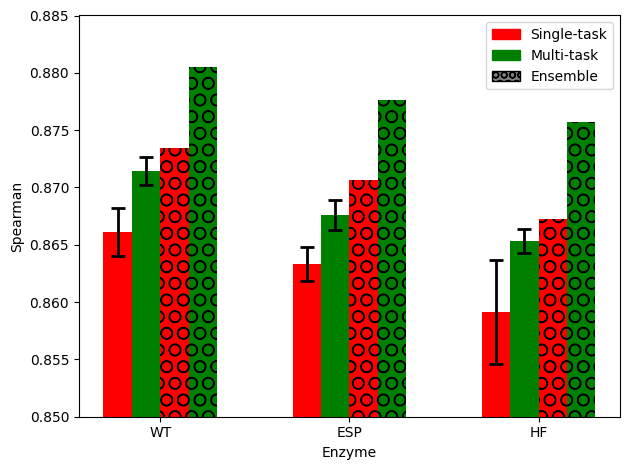

In [2]:
# Adjusted sample data to match the new order
data = {
    'WT': [(0.866129327, 0.002073498), (0.871410252, 0.001224376), (0.873438202, None), (0.880479122, None)],
    'ESP': [(0.863328868, 0.001447701), (0.867588501, 0.001287511), (0.870692818, None), (0.877605318, None)],
    'HF': [(0.859150978, 0.004511548), (0.865328354, 0.001006483), (0.867265678, None), (0.875705564, None)],
}

approaches = ['ST No Ens', 'MT No Ens', 'ST Ens', 'MT Ens']

# Plot setup
num_enzymes = len(data)
num_approaches = len(approaches)
index = np.arange(num_enzymes)  # Enzyme indices
bar_width = 0.15  # Width of a single bar

fig, ax = plt.subplots()

# Colors and patterns adjusted for the new order
colors = ['red', 'green', 'red', 'green']
hatch_patterns = ['', '', 'O', 'O']  # Circles for ensemble

for i, approach in enumerate(approaches):
    means = [data[enzyme][i][0] for enzyme in data]
    stds = [data[enzyme][i][1] if data[enzyme][i][1] is not None else 0 for enzyme in data]
    bars = ax.bar(index + i*bar_width, means, bar_width, color=colors[i], 
                  label=approach, hatch=hatch_patterns[i])
    # Add error bars only if standard deviation is provided
    error_config = {'elinewidth': 2, 'capsize': 5, 'capthick': 2, 'fmt': 'none', 'color': 'black'}
    for j, std in enumerate(stds):
        if std > 0:  # Check if std is not zero, indicating it was provided
            ax.errorbar(index[j] + i*bar_width, means[j], yerr=std, **error_config)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Enzyme')
ax.set_ylabel('Spearman')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(list(data.keys()))

# Custom legend for task and ensemble type, with adjustments
legend_elements = [
    mpatches.Patch(color='red', label='Single-task'),
    mpatches.Patch(color='green', label='Multi-task'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='OO', label='Ensemble')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_ylim(0.850, 0.885)
plt.tight_layout()

# save with high dpi
plt.savefig('first_plot.png', dpi=800)
plt.show()

# More Figs

In [3]:
def get_dict_avg_std(filename, datasets, categories, is_various=False):
    data = pd.read_csv(filename)
    dict_average = {}
    dict_std = {}

    for category in categories:
        dict_average[category] = []
        dict_std[category] = []

    for dataset in datasets:
        
  
        dataset_columns = [col for col in data.columns if dataset in col]
        std_column = [col for col in dataset_columns if 'Std' in col]
        average_column = [col for col in dataset_columns if 'Average' in col]
        #print(f'{dataset_columns} {std_column} {average_column}')

        for category in categories:
            #print(f'{category} {dataset}')
            if is_various and dataset == 'leenay':
                dict_average[category].append(0)
                dict_std[category].append(0)
                continue
            
            if is_various:
                category_row = data[data['method'] == category]
            else:
                category_row = data[data['TL METHOD'] == category]
            avg_value = category_row[average_column].values[0,0]
            std_value = category_row[std_column].values[0,0]
            dict_average[category].append(avg_value)
            dict_std[category].append(std_value)

    return dict_average, dict_std





In [4]:
# Example datasets and categories
original_datasets = ['xu2015TrainHl60',
            'chari2015Train293T',
            'hart2016-Rpe1Avg',
            'hart2016-Hct1162lib1Avg',
            'hart2016-HelaLib1Avg',
            'hart2016-HelaLib2Avg',
            'xu2015TrainKbm7',
            'doench2014-Hs',
            'doench2014-Mm',
            'doench2016_hg19',
            'doench2016plx_hg19',
            'morenoMateos2015',
            'leenay']
datasets = []
IDEAL_LENGTH = 26
for dataset in original_datasets:
    # add spaces to the end of the dataset name to make it IDEAL_LENGTH long
    dataset += ' ' * (IDEAL_LENGTH - len(dataset))
    datasets.append(dataset)

categories_tl = ['gl_tl', 'full_tl', 'no_em_tl', 'LL_tl', 'no_tl', 'no_pre_train']

data_means_deephf,  data_stds_deephf= get_dict_avg_std('results_dhf.csv', original_datasets, categories_tl)
data_means_crispron, data_stds_crispron= get_dict_avg_std('results_co.csv', original_datasets, categories_tl)

categories_various = ['wuCrispr', 'wang', 'doench', 'chariRaw']
data_means_various, data_stds_various= get_dict_avg_std('results_various.csv', original_datasets, categories_various, is_various = True)


print(data_means_deephf)

{'gl_tl': [0.62374, 0.36084, 0.33372, 0.47768, 0.42914, 0.4833, 0.63904, 0.63394, 0.60246, 0.4054, 0.32804, 0.40478, 0.26702], 'full_tl': [0.6245, 0.42014, 0.33408, 0.48032, 0.43224, 0.48726, 0.63952, 0.64532, 0.61058, 0.40636, 0.3318, 0.41438, 0.26798], 'no_em_tl': [0.62376, 0.41602, 0.3309, 0.47736, 0.42874, 0.4793, 0.63808, 0.63528, 0.59846, 0.4058, 0.3292, 0.38606, 0.2518], 'LL_tl': [0.62334, 0.34966, 0.33386, 0.47722, 0.42918, 0.48326, 0.63858, 0.6337, 0.60262, 0.40584, 0.32644, 0.39898, 0.24866], 'no_tl': [0.6174, 0.43494, 0.31876, 0.47324, 0.42452, 0.47064, 0.62996, 0.62744, 0.5837, 0.40164, 0.32292, 0.26166, 0.19642], 'no_pre_train': [0.31044, 0.03328, 0.08882, 0.1484, 0.09286, 0.17932, 0.34294, 0.29066, 0.18456, 0.24312, 0.22792, 0.2748, 0.11778]}


## TL Comparison

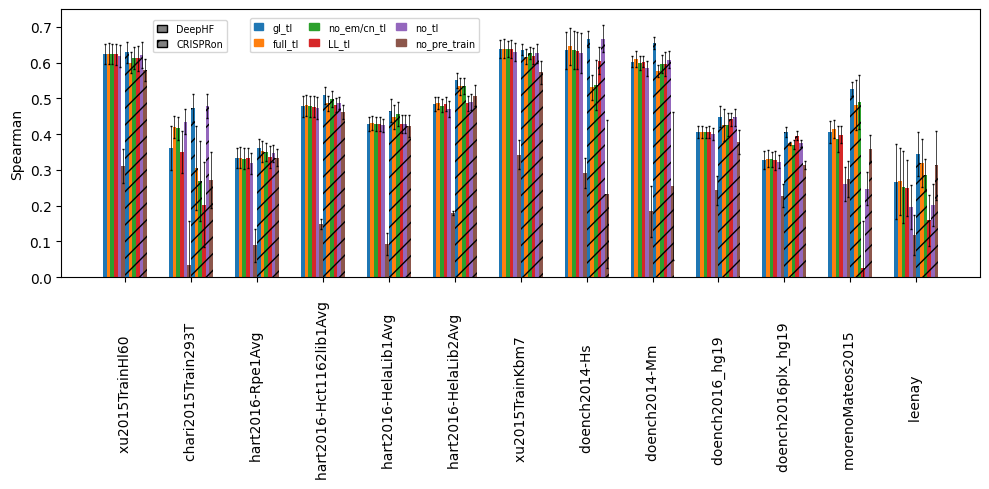

In [5]:



hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']



num_datasets = len(datasets)
num_categories = len(categories_tl)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width / 2  # half for normal, half for OO texture
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories_tl):
    plt.bar(index + i * bar_width, data_means_deephf[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds_deephf[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Plot bars for OO texture model with 'hatch' pattern
for i, category in enumerate(categories_tl):
    plt.bar(index + (i+6) * bar_width , data_means_crispron[category], bar_width, 
            label=f'{category} (OO Texture)', hatch='//', yerr=data_stds_crispron[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})
# Add labels, title, and legend
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
plt.xticks(index-bar_width*3.5 + total_width / 2, datasets, rotation=90)


legend_1_elements = [
    mpatches.Patch(color=hex_colors[0], label='gl_tl'),
    mpatches.Patch(color=hex_colors[1], label='full_tl'),
    mpatches.Patch(color=hex_colors[2], label='no_em/cn_tl'),
    mpatches.Patch(color=hex_colors[3], label='LL_tl'),
    mpatches.Patch(color=hex_colors[4], label='no_tl'),
    mpatches.Patch(color=hex_colors[5], label='no_pre_train'),]


legend_2_elements = [
    mpatches.Patch(facecolor='grey', edgecolor='k', label='DeepHF'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='//', label='CRISPRon')]

legend1 = plt.legend(handles=legend_1_elements, loc='lower center', bbox_to_anchor=(0.33, 0.82), ncol=3,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

plt.gca().add_artist(legend1)

plt.legend(handles=legend_2_elements, loc='lower center', bbox_to_anchor=(0.14, 0.82), ncol=1,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)



# make figure bigger
plt.gcf().set_size_inches(10, 5)

# set y axis limits
plt.ylim(0.0, 0.75)
# make figure bigger

# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part1.svg', dpi=400)

# Show the plot
plt.show()


## VS Other Methods

0.261295456


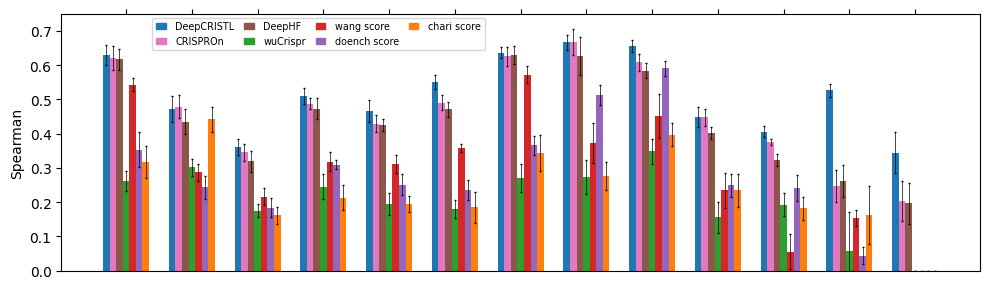

In [6]:
# Example datasets and categories
categories = ['DeepCRISTL', 'CRISPROn', 'DeepHF', 'wuCrispr', 'wang score', 'doench score', 'chari score']

# Mean Spearman scores for two models (normal and with 'OO' texture)
data_means = {
    'DeepCRISTL': data_means_crispron['gl_tl'],
    'CRISPROn': data_means_crispron['no_tl'],
    'DeepHF': data_means_deephf['no_tl'],
    'wuCrispr': data_means_various['wuCrispr'],
    'wang score': data_means_various['wang'],
    'doench score': data_means_various['doench'],
    'chari score': data_means_various['chariRaw'],
}



# Standard deviations for each category
data_stds = {
    'DeepCRISTL':  data_stds_crispron['gl_tl'],
    'CRISPROn':  data_stds_crispron['no_tl'],
    'DeepHF':  data_stds_deephf['no_tl'],
    'wuCrispr':  data_stds_various['wuCrispr'],
    'wang score':  data_stds_various['wang'],
    'doench score':  data_stds_various['doench'],
    'chari score':  data_stds_various['chariRaw'],
}

print(data_means['wuCrispr'][0])




hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
#hex_colors = ['#1f77b4', '#f0e442', '#17becf', '#bcbd22', '#e7ba52', '#7f7f7f', '#dbdb8d']
#hex_colors = ['#1f77b4', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725']
hex_colors = ['#1f77b4', '#e377c2', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e']



num_datasets = len(datasets)
num_categories = len(categories)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width 
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, data_means[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Add labels, title, and legend
# show x label on top
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
#plt.xticks(index-bar_width*2+ total_width / 2, datasets, rotation=90)
# same but xticks are above the bars
#plt.xticks(index-bar_width*2 + total_width / 2, None)
# remove xticks
plt.xticks([])


legend_elements = [
    mpatches.Patch(color=hex_colors[0], label='DeepCRISTL'),
    mpatches.Patch(color=hex_colors[1], label='CRISPROn'),
    mpatches.Patch(color=hex_colors[2], label='DeepHF'),
    mpatches.Patch(color=hex_colors[3], label='wuCrispr'),
    mpatches.Patch(color=hex_colors[4], label='wang score'),
    mpatches.Patch(color=hex_colors[5], label='doench score'),
    mpatches.Patch(color=hex_colors[6], label='chari score'),
]





plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.28, 0.84), ncol=4,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

# make figure bigger
plt.gcf().set_size_inches(10, 3)

# set y axis limits
plt.ylim(0.0, 0.75)

# show x axis on top
plt.gca().xaxis.set_ticks_position('top')

plt.xticks(index-bar_width*2 + total_width / 2, [], rotation=90)



# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part2.svg', dpi=400)

# Show the plot
plt.show()


In [7]:
# # combine
# from PIL import Image
# def merge_images_vertically(img_path1, img_path2, output_path):
#     # Open the images
#     image1 = Image.open(img_path1)
#     image2 = Image.open(img_path2)
    
#     # Calculate the size of the output image
#     width = max(image1.width, image2.width)
#     height = image1.height + image2.height
    
#     # Create a new image with the calculated size
#     new_image = Image.new('RGB', (width, height))
    
#     # Paste the first image at the top
#     new_image.paste(image1, (0, 0))
    
#     # Paste the second image below the first one
#     new_image.paste(image2, (0, image1.height))
    
#     # Save the new image
#     new_image.save(output_path)


# import xml.etree.ElementTree as ET

# def merge_svgs_vertically(svg_path1, svg_path2, output_path):
#     # Parse the SVG files
#     tree1 = ET.parse(svg_path1)
#     root1 = tree1.getroot()
#     tree2 = ET.parse(svg_path2)
#     root2 = tree2.getroot()

#     # Extract width and height from the first SVG
#     width1 = int(root1.get('width', '0').replace('px', ''))
#     height1 = int(root1.get('height', '0').replace('px', ''))

#     # Extract width and height from the second SVG
#     width2 = int(root2.get('width', '0').replace('px', ''))
#     height2 = int(root2.get('height', '0').replace('px', ''))

#     # Calculate the new width and height
#     new_width = max(width1, width2)
#     new_height = height1 + height2

#     # Create a new SVG root element
#     new_svg = ET.Element('svg', width=str(new_width), height=str(new_height), xmlns="http://www.w3.org/2000/svg")

#     # Add all elements from the first SVG to the new SVG
#     for element in root1:
#         new_svg.append(element)

#     # Adjust Y coordinates for the elements from the second SVG and add them
#     for element in root2:
#         if 'y' in element.attrib:
#             element.attrib['y'] = str(int(element.attrib['y']) + height1)
#         new_svg.append(element)

#     # Create a new tree from the new SVG
#     new_tree = ET.ElementTree(new_svg)

#     # Write the new SVG file
#     new_tree.write(output_path)

# # Example usage
# merge_svgs_vertically('part1.svg', 'part2.svg', 'combined.svg')


# # Show the combined image



# # delete all 3 images
# import os
# os.remove('part1.png')
# os.remove('part2.png')
# #os.remove('combined.png')

# Image.open('combined.png')


# LOSS GRAPHS

In [8]:
def show_loss_graph_zoomed(val_loss, train_loss, title, early_stopping=15, context_window=0, save_name= None, no_early_stopping=False):
    last_epoch = len(val_loss)
    early_stopping_epoch = last_epoch - early_stopping - 1 if early_stopping is not None else None

    # Main plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(val_loss, label='Validation loss')
    ax.plot(train_loss, label='Training loss')

    # Add vertical line for early stopping
    if early_stopping_epoch is not None:
        if not no_early_stopping:
            ax.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early stopping')
        ax.set_title(title)
        ax.legend(fontsize='small')
    
    if context_window == 0:
        if save_name is not None:
            plt.savefig(save_name, dpi=800)

        plt.show()
   
        return
    
    if not no_early_stopping:
        # put a circle around the early stopping point
        if early_stopping_epoch is not None:
            ax.plot(early_stopping_epoch, val_loss[early_stopping_epoch], 'ro')



    # Inset plot around the early stopping point
    if early_stopping_epoch is not None:
        # Calculate start and end indices for the zoomed context
        start_index = max(0, early_stopping_epoch - context_window)
        end_index = min(len(val_loss), early_stopping_epoch + context_window + 1)

        # Define the position and size of the inset
        ax_inset = fig.add_axes([0.35, 0.5, 0.25, 0.25])
        ax_inset.plot(range(start_index, end_index), val_loss[start_index:end_index], label='Validation loss zoomed')
        ax_inset.plot(range(start_index, end_index), train_loss[start_index:end_index], label='Training loss zoomed')
        if not no_early_stopping:
            # Optionally add vertical line in the inset for early stopping
            ax_inset.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early stopping')





    # save high dpi
    if save_name is not None:
        plt.savefig(save_name, dpi=800)

    plt.show()



In [9]:
#from brokenaxes import brokenaxes
 


def show_loss_graph(val_loss, train_loss, title, show_last_n=None, early_stopping = 15):
    if show_last_n == 'remove_first':
        show_last_n = len(val_loss) - 1
    last_epoch = len(val_loss)
    if early_stopping == None:
        early_stopping_epoch = None
    else:
        early_stopping_epoch = last_epoch - early_stopping-1
    plt.plot(val_loss, label='Validation loss')
    plt.plot(train_loss, label='Training loss')
    # add vertical line for early stopping
    if early_stopping_epoch is not None:
        plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early stopping')
    plt.title(title)
    plt.legend()
    plt.show()

    # now the same with the last n epochs
    if show_last_n is not None:
        starting_diff = len(val_loss) - show_last_n
        x_values = range(starting_diff, len(val_loss))

        # Plot using x_values for the x-axis
        plt.plot(x_values, val_loss[-show_last_n:], label='Validation loss')
        plt.plot(x_values, train_loss[-show_last_n:], label='Training loss')
        # add vertical line for early stopping
        if early_stopping_epoch is not None:
            plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early stopping')
        plt.title(title)
        # change x axis to show only the last n epochs
       # plt.xlim(len(val_loss) - show_last_n, len(val_loss))
        plt.legend()
        plt.show()


In [10]:
dhf_pretrain_val_loss = [0.022885681033612677,0.0179318568972083,0.015000633442549895,0.013823838711870455,0.013431630303450985,0.012355583455559989,0.011710438553153242,0.011681079148273772,0.011136771038039324,0.010930555339724729,0.010976315625443142,0.011180962261927758,0.011534226778513793,0.010210425284971127,0.010746166509822545,0.010339727735896613,0.010376187550992242,0.010767879189708182,0.009980385546463603,0.009631456839274598,0.0096763689253951,0.009722706833067403,0.009809498501516925,0.010422310735489377,0.009691372014444786,0.009870455553196772,0.009683607542441778,0.009684836504465909]
dhf_pretrain_train_loss = [1.1699221701180968,0.022326279213918606,0.018717740942075536,0.01670049042045197,0.015403969675829094,0.01450927462108578,0.013940963592155449,0.013313015797647284,0.012746961690259344,0.012399638173734058,0.011941492523027142,0.011588198273059352,0.011279899936046273,0.011013761997471715,0.01076021665207427,0.01051832499967893,0.010220400152182937,0.01006008058778606,0.009883610816570158,0.009610534333871242,0.009393905226432603,0.009243086417953955,0.00901439040846025,0.008884999297062811,0.008690175217635399,0.008110176473028988,0.007947839973691515,0.007812525775987044]

dhf_moreno_val_loss = [0.09190519899129868, 0.08347360044717789, 0.08111526072025299, 0.08106289803981781, 0.07901716232299805, 0.07756617665290833, 0.0752100795507431, 0.07414261996746063, 0.07444396615028381, 0.07389181107282639, 0.07464832067489624, 0.07609353214502335, 0.07566380500793457, 0.07833698391914368, 0.0769779309630394, 0.07922240346670151, 0.08024492114782333, 0.07789719849824905, 0.0813499465584755, 0.08226680755615234, 0.08219097554683685, 0.08549071848392487, 0.08366390317678452, 0.08973275870084763, 0.0854044258594513]
dhf_moreno_train_loss = [0.08033473064907554, 0.06548112752486249, 0.059220638455582314, 0.05526184148731686, 0.05134435778572446, 0.04677807222925076, 0.04495238895420314, 0.04085456699031551, 0.038384415386688145, 0.033685793403257315, 0.03193134026361161, 0.027324972496855827, 0.025411236689102893, 0.024570594269300805, 0.02349290469674026, 0.02152508506107898, 0.019778908021291907, 0.018441728728056765, 0.017445437527787523, 0.01696370863894216, 0.015369992126666364, 0.015531463605560819, 0.014502439495860314, 0.014074149300806782, 0.013422275849041484]



dhf_hart_val_loss= [0.020412371274741256, 0.0210884201395161, 0.020544171607231394, 0.02050315879066201]
dhf_hart_train_loss= [0.02369166519274016, 0.020475232608947055, 0.01916417980070564, 0.018377104286571317]

co_pretrain_val_loss= [1602.1959228515625,965.74755859375,382.3779296875,354.12591552734375,349.5929260253906,344.2820739746094,340.35089111328125,335.7764587402344,331.6773681640625,329.04730224609375,323.6441955566406,319.2796630859375,314.87969970703125,308.2076416015625,304.28143310546875,298.4681701660156,293.3115539550781,287.7877197265625,279.99359130859375,272.3409118652344,267.7666931152344,260.2811279296875,254.49459838867188,251.26287841796875,245.92185974121094,244.32862854003906,238.5092315673828,234.1333465576172,229.99813842773438,226.45555114746094,222.5447540283203,218.8355255126953,219.38775634765625,214.21426391601562,210.1737060546875,206.1980438232422,206.1819305419922,201.7685546875,200.1955108642578,198.68690490722656,197.77627563476562,196.79373168945312,195.5692138671875,196.14224243164062,192.5265655517578,193.87843322753906,190.71224975585938,190.8813934326172,190.46177673339844,190.19395446777344,189.05638122558594,187.96893310546875,188.9286651611328,186.78196716308594,187.47850036621094,187.9158172607422,186.20433044433594,187.05282592773438,186.87799072265625,184.5764617919922,185.6381072998047,186.89601135253906,183.99688720703125,186.3379669189453,185.61785888671875,181.96542358398438,183.13046264648438,181.8360137939453,181.10462951660156,183.90794372558594,180.96324157714844,181.6342315673828,181.971435546875,180.30807495117188,178.86436462402344,179.48028564453125,179.52442932128906,178.45884704589844,179.38084411621094,181.33070373535156,180.5056610107422,179.41152954101562,179.99395751953125,177.2139434814453,177.4437255859375,177.64451599121094,179.74766540527344,177.112548828125,175.568603515625,176.05189514160156,175.3627471923828,179.37017822265625,177.81817626953125,176.80419921875,176.16773986816406,174.7164764404297,174.85801696777344,174.88572692871094,175.26791381835938,177.52627563476562,177.4521026611328,178.14439392089844,174.28253173828125,174.92007446289062,173.0011749267578,174.30032348632812,172.5637969970703,173.59364318847656,175.43861389160156,172.3836212158203,172.0490264892578,171.61151123046875,172.8473358154297,173.06593322753906,172.16522216796875,175.1359100341797,173.3067626953125,173.3295440673828,171.9921417236328,170.1783447265625,171.5576934814453,171.50311279296875,168.91799926757812,169.92457580566406,171.07046508789062,170.5081787109375,171.27438354492188,169.68899536132812,169.1825714111328,169.7965545654297,170.56263732910156,170.04122924804688,172.08494567871094,170.6625213623047,169.0229949951172,167.7949676513672,168.19810485839844,171.12863159179688,174.3263397216797,168.8834686279297,167.26470947265625,169.38401794433594,167.5371856689453,168.47207641601562,166.60438537597656,167.54135131835938,168.21438598632812,167.35655212402344,166.80960083007812,166.04261779785156,167.7244110107422,168.45179748535156,167.49008178710938,166.48126220703125,165.26734924316406,167.7415313720703,166.49102783203125,165.03318786621094,163.91455078125,166.2966766357422,167.9960479736328,164.3553924560547,165.7706756591797,165.34803771972656,165.5636444091797,166.84918212890625,165.70152282714844,165.1085968017578,164.8625030517578,167.3466796875,164.2273712158203,163.68414306640625,163.40760803222656,163.364990234375,167.51498413085938,163.1753692626953,165.82997131347656,162.99937438964844,164.8373260498047,164.56185913085938,164.3667755126953,164.71473693847656,164.35157775878906,164.74668884277344,162.7675323486328,163.55921936035156,163.01004028320312,162.98727416992188,165.81808471679688,161.76123046875,162.62484741210938,164.7736358642578,162.57769775390625,164.2775115966797,162.8371124267578,162.17918395996094,161.93759155273438,164.03701782226562,161.5319366455078,163.64166259765625,161.95339965820312,163.3505401611328,163.70591735839844,166.46832275390625,161.87213134765625,162.9386749267578,162.955322265625,163.7802734375,161.03590393066406,162.31338500976562,161.07872009277344,161.9666290283203,163.81765747070312,162.8973846435547,161.5631103515625,160.77310180664062,161.7351837158203,162.47781372070312,161.80264282226562,160.67848205566406,161.58851623535156,161.3251495361328,163.5089569091797,162.1361083984375,161.76199340820312,161.51609802246094,161.95005798339844,165.01345825195312,160.6065673828125,160.48362731933594,163.11163330078125,161.31988525390625,162.1401824951172,160.1452178955078,160.59280395507812,162.0113067626953,161.8316650390625,162.56138610839844,160.14088439941406,160.34034729003906,160.9053192138672,161.00526428222656,160.78070068359375,160.31715393066406,160.22500610351562,159.62815856933594,160.67262268066406,161.87892150878906,161.84634399414062,160.55311584472656,163.43609619140625,159.83534240722656,161.41275024414062,159.0585479736328,160.20010375976562,160.77255249023438,159.26028442382812,159.2951202392578,163.8025360107422,159.4768524169922,159.23345947265625,160.33917236328125,160.9347686767578,161.98081970214844,161.76852416992188,160.6151580810547,161.59228515625,159.36477661132812,159.07652282714844,160.01681518554688,160.8603973388672,160.55087280273438,159.0826873779297,161.79872131347656,159.40963745117188,159.9744110107422,160.99844360351562,159.41156005859375,161.34283447265625,158.53311157226562,162.8577423095703,160.70196533203125,161.93927001953125,159.96609497070312,159.72276306152344,160.9390106201172,159.4164276123047,159.63803100585938,158.24600219726562,160.09246826171875,160.15354919433594,159.08204650878906,161.5447998046875,159.08981323242188,164.29348754882812,159.82713317871094,161.32852172851562,160.78912353515625,160.79660034179688,161.3258514404297,160.6717987060547,159.68118286132812,159.13192749023438,160.52157592773438,159.7640380859375,159.9071044921875,160.3917236328125,161.45066833496094,160.07212829589844,163.1986541748047,160.44068908691406,158.88534545898438,158.9575653076172,159.41226196289062,159.629150390625,159.69081115722656,162.48670959472656,158.61537170410156,160.53492736816406,159.14276123046875,159.79556274414062,160.68617248535156,159.04627990722656,160.95790100097656,160.07244873046875,160.41290283203125,159.48268127441406,159.76266479492188,158.65187072753906,159.5768585205078,161.9438018798828,159.57554626464844,160.41461181640625,160.4123992919922,159.97079467773438,160.2848663330078,160.83969116210938,158.7654571533203,160.46519470214844,158.84268188476562,158.8120574951172,160.2490692138672,158.59182739257812,159.1634521484375,159.90834045410156,158.9411163330078,160.02294921875,160.9951934814453,160.7816619873047,161.5532989501953,159.6407470703125,161.224853515625,159.12176513671875,159.5120086669922,160.26441955566406,159.98768615722656,159.2525634765625,158.13052368164062,157.99996948242188,157.8031768798828,158.58941650390625,160.38369750976562,160.82582092285156,161.4945831298828,160.27801513671875,160.34983825683594,160.33087158203125,159.69137573242188,159.1292266845703,158.24949645996094,161.33094787597656,159.5990447998047,159.19175720214844,160.83787536621094,158.78651428222656,158.9779510498047,161.92291259765625,159.73306274414062,159.39401245117188,161.54461669921875,160.62840270996094,159.69398498535156,159.01025390625,159.59242248535156,161.9534454345703,160.69583129882812,160.4792938232422,159.5575714111328,159.98455810546875,160.3815460205078,161.08135986328125,160.84385681152344,159.37962341308594,159.94227600097656,159.64266967773438,159.71829223632812,160.0518341064453,160.8468475341797,160.37429809570312,159.1728057861328,160.12705993652344,161.4815216064453,159.0459747314453,160.43138122558594,161.16603088378906,161.3289794921875,160.92572021484375,160.38111877441406,160.03904724121094,159.5113983154297,161.01475524902344,159.13125610351562,160.3417205810547,162.67388916015625,162.7530059814453,160.00161743164062,161.1284942626953,161.0555877685547,159.61001586914062,161.33982849121094,160.03907775878906,161.39312744140625,159.91709899902344,159.40370178222656,159.99974060058594,161.06874084472656,160.6106719970703,160.75450134277344,160.6560821533203,162.4886474609375,159.92201232910156,160.12579345703125,160.15000915527344,161.3257598876953,161.80271911621094,159.6730499267578,159.98928833007812,162.23558044433594,161.64398193359375,159.8938446044922,159.74819946289062,160.44769287109375,161.62844848632812,162.8123321533203,163.9227294921875,160.73348999023438,160.08094787597656,160.766845703125,160.48008728027344,160.3260955810547,160.27432250976562,161.80406188964844,159.6208038330078,160.10032653808594,160.43484497070312,161.96072387695312,162.03121948242188,160.32664489746094,161.06597900390625,161.89886474609375]
co_pretrain_train_loss= [1891.166259765625,1334.26171875,709.43505859375,470.1514892578125,457.9879455566406,455.2759094238281,444.8921203613281,435.188720703125,429.1914367675781,420.3502502441406,413.5164489746094,405.2181701660156,400.65643310546875,387.2040100097656,380.7493591308594,378.31622314453125,366.83197021484375,365.4379577636719,352.6660461425781,349.7085876464844,337.9668884277344,334.2648620605469,328.0198669433594,326.5576171875,315.8748779296875,315.7246398925781,309.419189453125,303.0261535644531,301.7824401855469,296.28607177734375,295.1630859375,288.33935546875,289.23052978515625,279.4925842285156,279.4295959472656,276.2218017578125,272.60888671875,268.2421875,269.1746826171875,263.31719970703125,264.76544189453125,261.00286865234375,259.8584289550781,261.1249084472656,258.3993225097656,258.4798889160156,255.4187469482422,254.45489501953125,252.8759002685547,251.5858612060547,250.98504638671875,249.817138671875,248.8927001953125,248.4192657470703,245.58123779296875,247.26004028320312,246.255859375,244.6605987548828,245.59022521972656,242.2141571044922,243.35398864746094,238.74098205566406,241.51751708984375,236.92135620117188,243.04385375976562,240.96141052246094,238.5401153564453,236.52926635742188,235.27882385253906,236.44544982910156,239.40972900390625,236.70498657226562,235.92909240722656,236.15017700195312,234.99594116210938,233.5563201904297,235.0075225830078,230.17095947265625,233.71749877929688,232.5026397705078,234.41302490234375,229.5850830078125,232.232666015625,231.89266967773438,232.4452362060547,229.07534790039062,230.54464721679688,228.68295288085938,229.27783203125,225.70230102539062,227.14617919921875,227.9816131591797,227.91110229492188,227.4295196533203,227.4020233154297,226.76173400878906,226.7992706298828,225.43089294433594,222.96728515625,225.3254852294922,225.23794555664062,225.0255889892578,224.51702880859375,223.52085876464844,221.40269470214844,221.9700469970703,225.06590270996094,222.1562042236328,221.4266357421875,222.58935546875,223.35443115234375,219.94993591308594,221.28250122070312,221.9414825439453,218.6329345703125,219.8688507080078,216.7645721435547,217.74876403808594,217.49449157714844,218.9551239013672,218.58274841308594,216.00633239746094,218.35667419433594,216.37155151367188,216.5141143798828,215.45407104492188,214.92288208007812,215.66122436523438,215.0135498046875,216.88026428222656,215.1344757080078,213.9193572998047,213.33001708984375,213.03219604492188,211.4219512939453,214.22703552246094,213.46115112304688,213.60719299316406,211.70652770996094,213.30499267578125,208.7102813720703,211.29917907714844,211.90980529785156,211.42340087890625,208.88035583496094,211.15049743652344,211.36293029785156,209.75668334960938,211.9390869140625,210.46189880371094,209.88742065429688,211.36940002441406,209.82228088378906,207.3855438232422,208.34999084472656,208.42161560058594,209.5764923095703,206.17152404785156,206.28250122070312,206.0265350341797,204.70309448242188,204.4128875732422,206.59181213378906,205.0547332763672,207.77040100097656,206.92469787597656,202.8813018798828,204.6131134033203,202.34788513183594,204.76516723632812,205.0423126220703,202.84506225585938,203.16055297851562,207.3661346435547,203.0862579345703,203.5965118408203,202.75997924804688,204.2401123046875,202.2493896484375,203.91024780273438,205.01148986816406,201.04702758789062,199.4571990966797,201.40814208984375,201.1335906982422,200.4626922607422,202.5319061279297,203.41268920898438,200.39599609375,200.7619171142578,202.34751892089844,199.89700317382812,201.4598846435547,200.8915252685547,198.9550323486328,200.14878845214844,200.83889770507812,199.72052001953125,197.17843627929688,197.8384552001953,197.02792358398438,197.4420623779297,198.48385620117188,197.824462890625,194.2528533935547,196.50682067871094,196.81800842285156,196.8553466796875,194.932861328125,195.4433135986328,195.86302185058594,197.47003173828125,196.99331665039062,193.7527618408203,195.66574096679688,193.30789184570312,195.802978515625,194.3070526123047,193.69915771484375,193.47528076171875,193.37240600585938,192.1715087890625,196.49327087402344,194.0931854248047,195.138671875,194.42938232421875,192.0232391357422,193.00607299804688,191.89984130859375,194.0399169921875,192.73199462890625,192.9862823486328,193.1096954345703,191.69248962402344,190.99066162109375,188.98892211914062,191.4462127685547,191.21849060058594,192.16925048828125,192.10096740722656,190.15675354003906,190.4746551513672,191.3918914794922,191.46336364746094,189.7471160888672,189.8848876953125,190.33042907714844,190.4594268798828,190.97372436523438,188.58465576171875,189.1715545654297,188.15464782714844,189.4911651611328,187.75205993652344,188.45114135742188,185.78428649902344,188.43960571289062,188.5442657470703,189.3464813232422,187.83816528320312,186.63650512695312,187.53384399414062,186.86550903320312,186.55508422851562,190.40841674804688,188.3273468017578,188.35455322265625,185.74908447265625,186.3009796142578,182.3455047607422,184.21435546875,186.16615295410156,184.9995880126953,183.37171936035156,186.12425231933594,185.4544677734375,185.5220947265625,183.16163635253906,184.3151397705078,184.5933837890625,186.0688934326172,184.428466796875,181.16429138183594,181.45172119140625,184.41017150878906,179.2309112548828,181.7949981689453,184.48143005371094,182.3605194091797,180.9772186279297,180.074462890625,179.85858154296875,182.02650451660156,182.4876708984375,182.52142333984375,182.70773315429688,180.31185913085938,179.420654296875,180.92262268066406,181.40170288085938,179.5494842529297,180.82733154296875,180.41746520996094,177.73184204101562,178.56422424316406,179.1666717529297,178.36485290527344,178.9484100341797,177.2582244873047,177.38040161132812,180.4427490234375,177.2069854736328,179.8356475830078,180.7863006591797,179.07077026367188,179.08462524414062,175.82911682128906,181.68101501464844,176.31460571289062,176.0919189453125,177.30567932128906,176.39869689941406,175.964111328125,176.96051025390625,177.32412719726562,177.46861267089844,175.9152374267578,176.36827087402344,178.04832458496094,175.2677764892578,176.62454223632812,177.12342834472656,178.0872344970703,175.0998077392578,178.38864135742188,175.04994201660156,174.3448486328125,172.8970947265625,173.05178833007812,173.53228759765625,174.96673583984375,172.8607177734375,174.84413146972656,171.42283630371094,172.9764862060547,173.87557983398438,172.46292114257812,170.3098907470703,172.28854370117188,173.19956970214844,172.1286163330078,172.09019470214844,171.119140625,171.70339965820312,171.59954833984375,172.96966552734375,170.88438415527344,170.91407775878906,170.8236083984375,167.8634033203125,169.0357666015625,168.82672119140625,168.57574462890625,170.1597900390625,169.6227264404297,169.57530212402344,170.41598510742188,169.6892547607422,169.52017211914062,169.2385711669922,168.44728088378906,166.6903533935547,169.76004028320312,166.29200744628906,167.54290771484375,168.2417449951172,167.96658325195312,168.91796875,164.82823181152344,168.8870086669922,166.1085205078125,165.9070587158203,168.45069885253906,168.50970458984375,163.56175231933594,168.52154541015625,165.3335723876953,165.1271209716797,168.47726440429688,164.78407287597656,165.53445434570312,165.6575469970703,164.7556915283203,165.35089111328125,164.0107421875,164.96446228027344,166.11949157714844,164.86807250976562,165.85923767089844,164.86207580566406,164.4406280517578,165.83792114257812,163.2423095703125,163.9479217529297,162.91091918945312,163.03758239746094,163.2544403076172,163.19781494140625,161.45974731445312,161.0136260986328,164.5491943359375,162.69447326660156,156.97271728515625,161.46762084960938,162.572265625,161.4852294921875,161.06451416015625,160.8887481689453,162.207763671875,158.58560180664062,160.33935546875,159.1884002685547,161.27102661132812,160.76605224609375,159.43914794921875,158.79600524902344,159.8180389404297,158.73614501953125,158.93893432617188,159.22372436523438,161.45823669433594,158.5838165283203,160.13882446289062,156.52418518066406,159.32608032226562,157.17608642578125,157.35498046875,157.5689239501953,157.56277465820312,157.78892517089844,159.2081756591797,158.26193237304688,157.6467742919922,159.25611877441406,157.66937255859375,155.3544921875,153.69378662109375,154.60366821289062,156.57240295410156,156.94403076171875,157.45008850097656,155.8615264892578,155.70835876464844,152.54473876953125,155.47523498535156,153.90625,154.71310424804688,151.4253387451172,155.26840209960938,155.33786010742188]

co_moreno_gl_train_loss =  [0.01965385302901268, 0.01908126473426819, 0.017753412947058678, 0.016738394275307655, 0.01610308326780796, 0.015566310845315456, 0.016128268092870712, 0.015703754499554634, 0.015185761265456676, 0.014716019853949547, 0.014001216739416122, 0.013555771671235561, 0.01317925937473774, 0.013475305400788784, 0.013478185050189495, 0.012183151207864285, 0.012633177451789379]
co_moreno_gl_val_loss =  [0.017122240737080574, 0.01539758313447237, 0.015603703446686268, 0.01583295688033104, 0.015815408900380135, 0.015831608325242996, 0.016054818406701088, 0.019492780789732933, 0.01635860651731491, 0.01545119658112526, 0.015646817162632942, 0.017557401210069656, 0.016151530668139458, 0.015564831905066967, 0.015483498573303223, 0.015485852025449276, 0.0154407424852252]



co_moreno_ll_train_loss = [1892.2933349609375, 1318.64794921875, 961.9529418945312, 665.1350708007812, 467.9816589355469, 308.4739074707031, 194.797607421875, 119.98736572265625, 68.60736083984375, 38.27987289428711, 24.304540634155273, 19.861413955688477, 15.264697074890137, 13.918749809265137, 10.593826293945312, 8.567323684692383, 7.616972923278809, 6.432121753692627, 5.3512725830078125, 3.8624565601348877, 3.21531343460083, 2.5203871726989746, 1.9813309907913208, 1.5483713150024414, 1.2008821964263916, 1.0665905475616455, 0.7509260177612305, 0.6303648352622986, 0.4655592143535614, 0.38052162528038025, 0.2926829755306244, 0.23323707282543182, 0.2226608693599701, 0.1841905266046524, 0.15563316643238068, 0.15812969207763672, 0.13166983425617218, 0.12744447588920593, 0.12474248558282852, 0.1182931587100029, 0.10433793067932129, 0.10258723050355911, 0.10507769882678986, 0.10139862447977066, 0.10204913467168808, 0.10347885638475418, 0.09610456228256226, 0.09932342916727066, 0.09860195964574814, 0.09651782363653183, 0.09552232176065445, 0.09605062007904053, 0.09523556381464005, 0.0920223593711853, 0.09197603911161423, 0.08946236968040466, 0.09282615035772324, 0.09201151877641678, 0.09045960754156113, 0.09257607161998749, 0.09091700613498688, 0.09070133417844772, 0.08910802751779556, 0.08858493715524673, 0.08573488146066666, 0.08940920978784561, 0.0867568626999855, 0.08761268854141235, 0.08601585030555725, 0.0885154977440834, 0.08870094269514084, 0.08764322102069855, 0.08743643015623093, 0.08675900846719742, 0.08795269578695297, 0.08849748969078064, 0.086778424680233, 0.08455860614776611, 0.08656209707260132, 0.0870307981967926, 0.08599251508712769, 0.08714251965284348, 0.08534541726112366, 0.08516520261764526, 0.08607921749353409, 0.08441444486379623, 0.08517078310251236, 0.08485300838947296, 0.08455252647399902, 0.08509398996829987, 0.08412535488605499, 0.0848727822303772, 0.08523666113615036, 0.08384892344474792, 0.08458153158426285, 0.08379803597927094, 0.08420300483703613, 0.08447348326444626, 0.08352616429328918, 0.08383018523454666]
co_moreno_ll_val_loss = [1420.6571044921875, 1029.3419189453125, 744.4356689453125, 526.1592407226562, 352.2115478515625, 224.11898803710938, 132.3013916015625, 71.45960235595703, 35.3863525390625, 17.518726348876953, 9.887214660644531, 7.284461498260498, 6.109029769897461, 4.9596710205078125, 4.199378967285156, 3.1443517208099365, 2.4667880535125732, 1.8208906650543213, 1.3357526063919067, 1.178075909614563, 0.873462438583374, 0.6728212237358093, 0.5776710510253906, 0.47434133291244507, 0.37750592827796936, 0.32783520221710205, 0.2541530430316925, 0.20599575340747833, 0.15522682666778564, 0.12299592047929764, 0.10557850450277328, 0.09875157475471497, 0.09640432894229889, 0.09378702938556671, 0.09327463805675507, 0.09328684955835342, 0.09243376553058624, 0.09089270979166031, 0.08902847766876221, 0.08848340064287186, 0.08841492235660553, 0.08736629039049149, 0.0857793465256691, 0.0849992111325264, 0.0840492695569992, 0.08416801691055298, 0.08363722264766693, 0.0836278572678566, 0.08530746400356293, 0.0842166617512703, 0.08301038295030594, 0.08357701450586319, 0.083562470972538, 0.08310478180646896, 0.08380759507417679, 0.08305513858795166, 0.0813017413020134, 0.08235429227352142, 0.08191478997468948, 0.08184058219194412, 0.08061245083808899, 0.08051592856645584, 0.08048252761363983, 0.0799049660563469, 0.0800609141588211, 0.07972356677055359, 0.07945305854082108, 0.0792841911315918, 0.07917436957359314, 0.07921541482210159, 0.07906274497509003, 0.08017577975988388, 0.0806245505809784, 0.07945715636014938, 0.07924935966730118, 0.07867283374071121, 0.08049608021974564, 0.07985277473926544, 0.07984023541212082, 0.07869425415992737, 0.07931596785783768, 0.0792006179690361, 0.07965674996376038, 0.07930483669042587, 0.07899793237447739, 0.07866430282592773, 0.07909897714853287, 0.07913840562105179, 0.07890290766954422, 0.07922010123729706, 0.0785706639289856, 0.07915528863668442, 0.07863682508468628, 0.07937917858362198, 0.07955840975046158, 0.07899167388677597, 0.07911103963851929, 0.07887136191129684, 0.07960006594657898, 0.07921387255191803]


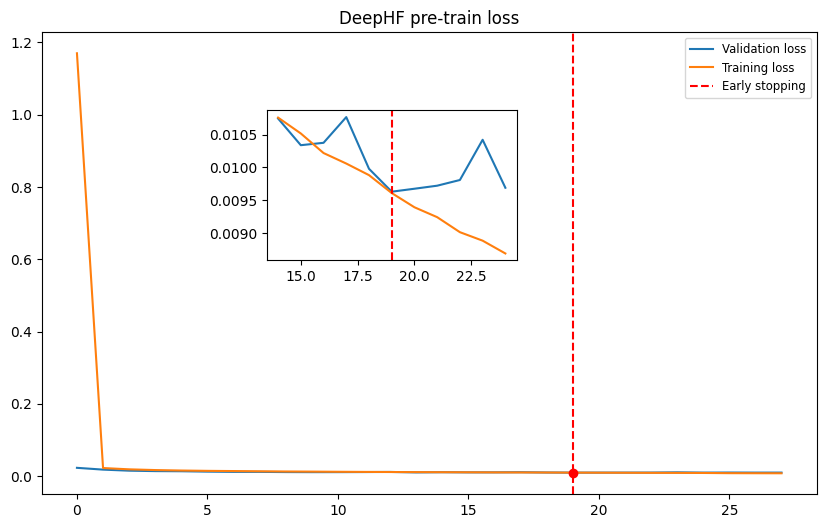

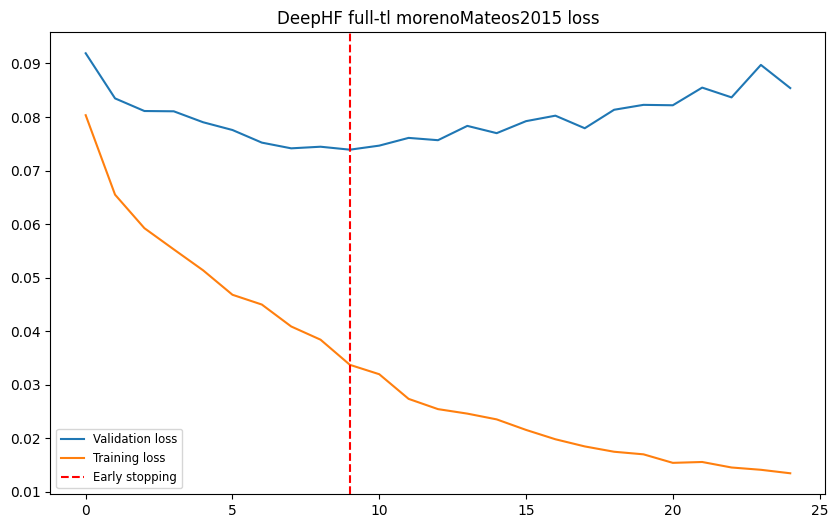

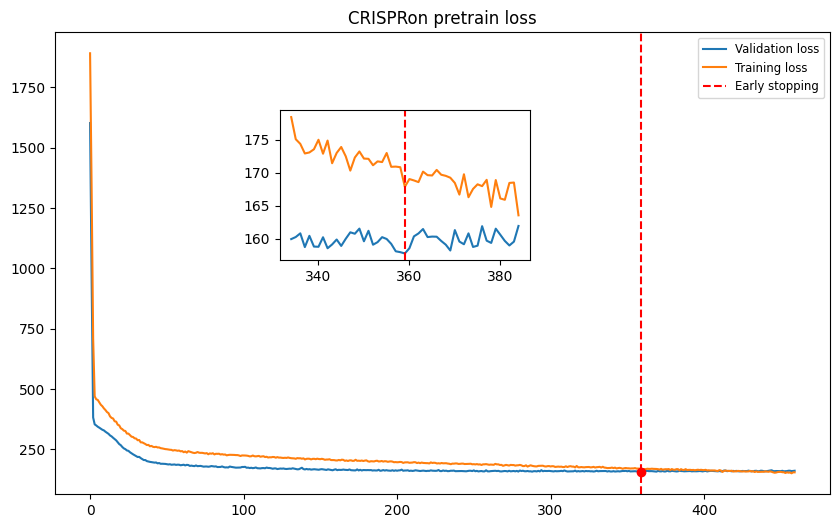

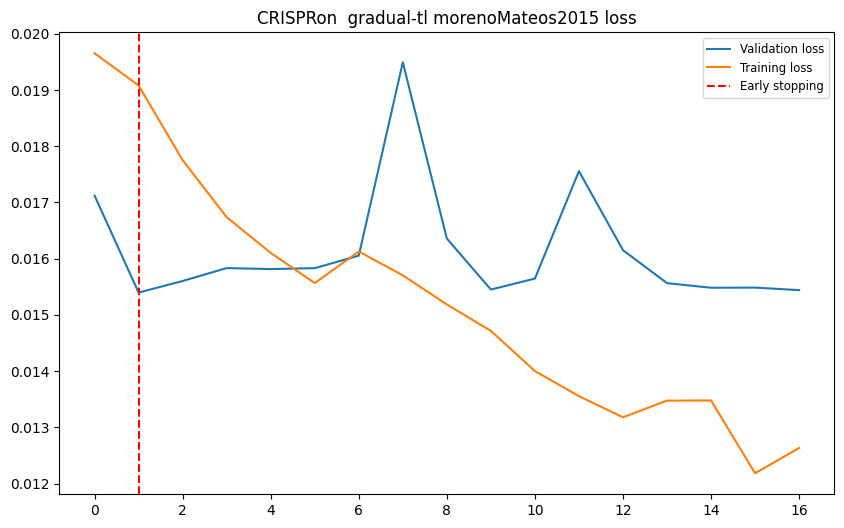

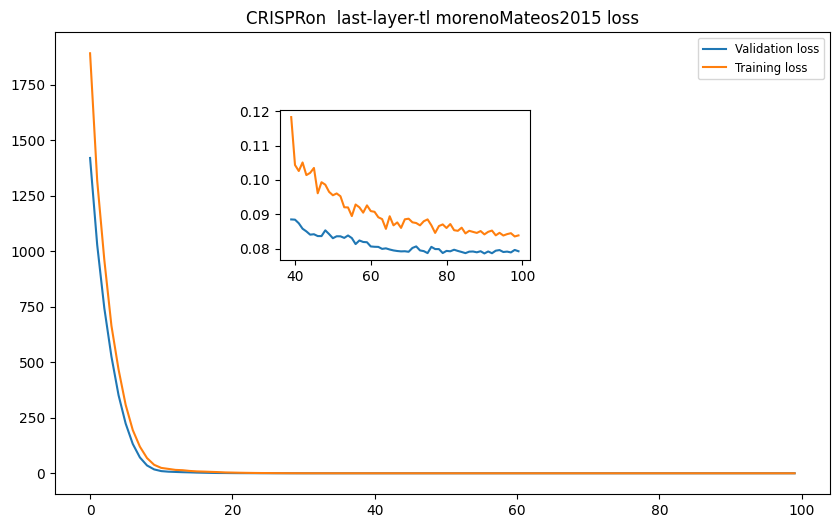

In [11]:

# show_loss_graph(dhf_pretrain_val_loss, dhf_pretrain_train_loss, 'DeepHF Pretrain Loss', show_last_n=20, early_stopping=8)
# show_loss_graph(dhf_moreno_val_loss, dhf_moreno_train_loss, 'DeepHF Full TL Moreno Loss', early_stopping=15)
# show_loss_graph(co_pretrain_val_loss, co_pretrain_train_loss, 'Co-Training Pretrain Loss', early_stopping=100, show_last_n=120)
# show_loss_graph(co_moreno_gl_val_loss, co_moreno_gl_train_loss, 'Co-Training GL TL Moreno Loss', early_stopping=15)
# show_loss_graph(co_moreno_ll_val_loss, co_moreno_ll_train_loss, 'Co-Training LL TL Moreno Loss', show_last_n=25, early_stopping=None)


# show_loss_graph_zoomed(dhf_pretrain_val_loss, dhf_pretrain_train_loss, 'DeepHF Pretrain Loss', show_last_n=17, early_stopping=8)
# show_loss_graph_zoomed(dhf_moreno_val_loss, dhf_moreno_train_loss, 'DeepHF Full TL Moreno Loss', early_stopping=15)
# show_loss_graph_zoomed(co_pretrain_val_loss, co_pretrain_train_loss, 'Co-Training Pretrain Loss', early_stopping=100, show_last_n=200)
# show_loss_graph_zoomed(co_moreno_gl_val_loss, co_moreno_gl_train_loss, 'Co-Training GL TL Moreno Loss', early_stopping=15)
# show_loss_graph_zoomed(co_moreno_ll_val_loss, co_moreno_ll_train_loss, 'Co-Training LL TL Moreno Loss', early_stopping=None)



show_loss_graph_zoomed(dhf_pretrain_val_loss, dhf_pretrain_train_loss, 'DeepHF pre-train loss', context_window=5, early_stopping=8, save_name='dhf_pretrain_loss.png')
show_loss_graph_zoomed(dhf_moreno_val_loss, dhf_moreno_train_loss, 'DeepHF full-tl morenoMateos2015 loss', early_stopping=15, save_name= 'dhf_moreno_loss.png')
show_loss_graph_zoomed(co_pretrain_val_loss, co_pretrain_train_loss, 'CRISPRon pretrain loss', early_stopping=100, context_window=25, save_name='co_pretrain_loss.png')
show_loss_graph_zoomed(co_moreno_gl_val_loss, co_moreno_gl_train_loss, 'CRISPRon  gradual-tl morenoMateos2015 loss', early_stopping=15, save_name='co_moreno_gl_loss.png')
show_loss_graph_zoomed(co_moreno_ll_val_loss, co_moreno_ll_train_loss, 'CRISPRon  last-layer-tl morenoMateos2015 loss', early_stopping=30, context_window=30, no_early_stopping=True, save_name='co_moreno_ll_loss.png')


# Sizes vs Performance

In [12]:
def plot_size_vs_performance(sizes_to_spearman_dict, title):
    sizes = list(sizes_to_spearman_dict.keys())
    spearman = [sizes_to_spearman_dict[size] for size in sizes]
    plt.plot(sizes, spearman)
    plt.xlabel('Size of training set')
    plt.ylabel('Spearman')
    #plt.title(title)
    # set x axis only to keys
    plt.xticks(sizes)
    # save figure higher dpi
    plt.savefig(title + '.png', dpi=800)
    plt.show()


sizes_to_target = {
    0:  ## TODO 
    5000: 
    10000: 
    15000: 
    20000:
    25903: 

}

sizes_to_target_dict = {
    0: 0.35952,
    5000: 0.51146,
    10000: 0.51686,
    15000: 0.51844,
    20000: 0.5272,
    25903: 0.52622,
}

sizes_to_target_std_dict = {
    0: 0.0,
    5000: 0.0,
    10000: 0.0,
    15000: 0.0,
    20000: 0.0,
    25903: 0.0,
}


sizes_to_pretrain_dict = {
    5000: 0.7036623772,
    10000: 0.7266469056,
    15000: 0.742151677,
    20000: 0.749000155,
}


plot_size_vs_performance(sizes_to_target_dict, 'DeepCRISTL morenoMateos2015 performance vs Training Set Size')      
plot_size_vs_performance(sizes_to_pretrain_dict, 'DeepCRISTL pretrain performance vs Training Set Size')


SyntaxError: invalid syntax (1083352022.py, line 17)